In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../sample_data/4502.csv')

In [5]:
# Add lagging and leading features
data["intensity_lag1"] = data["Intensity"].shift(1, fill_value=0)
data['intensity_lead1'] = data['Intensity'].shift(-1, fill_value=0)

# prepare features and target
X = data[['intensity_lag1', 'Intensity', 'intensity_lead1']]
y = data['Intensity']


In [35]:
## Train a random forest model
rf = RandomForestRegressor(n_estimators=1000, random_state=42, min_samples_split=100)
rf.fit(X, y)

# Make predictions
y_pred = rf.predict(X)

In [36]:
data['Predicted'] = y_pred

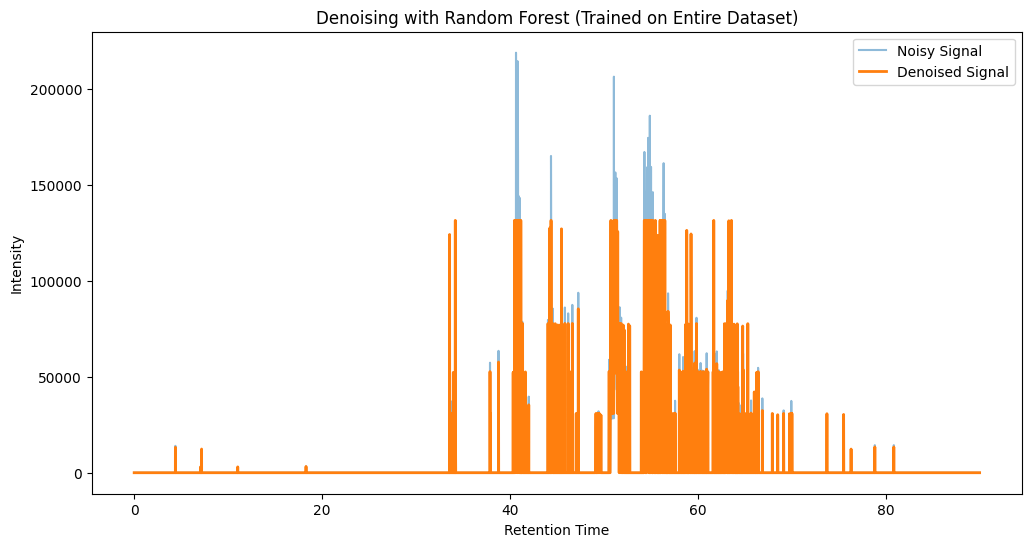

In [37]:
# Plot original vs. denoised signal
plt.figure(figsize=(12, 6))
plt.plot(data['RT'], data['Intensity'], label='Noisy Signal', alpha=0.5)
plt.plot(data['RT'], data['Predicted'], label='Denoised Signal', linewidth=2)
plt.xlabel('Retention Time')
plt.ylabel('Intensity')
plt.legend()
plt.title('Denoising with Random Forest (Trained on Entire Dataset)')
plt.show()